# 00 — Helper Methods

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_target_distribution(df, target='deposit'):
    counts = df[target].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title('Target Class Distribution')
    plt.xlabel(target)
    plt.ylabel('Count')
    plt.show()

def plot_numeric_histograms(df, cols):
    for c in cols:
        plt.figure()
        df[c].hist(bins=30)
        plt.title(f'Distribution of {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        plt.show()

def boxplot_numeric_by_target(df, num_col, target='deposit'):
    groups = [df[df[target]==v][num_col] for v in sorted(df[target].unique())]
    plt.boxplot(groups, labels=sorted(df[target].unique()))
    plt.title(f'{num_col} by {target}')
    plt.xlabel(target)
    plt.ylabel(num_col)
    plt.show()

def correlation_heatmap(df):
    corr = df.corr(numeric_only=True)
    plt.imshow(corr, cmap='coolwarm', aspect='auto')
    plt.title('Correlation Heatmap')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

def monthly_deposit_rate(df):
    tmp = df.copy()
    tmp['deposit_num'] = tmp['deposit'].map({'yes':1, 'no':0})
    order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    tmp['month'] = pd.Categorical(tmp['month'], categories=order, ordered=True)
    rates = tmp.groupby('month')['deposit_num'].mean()
    rates.plot(kind='bar', title='Deposit Rate by Month')
    plt.ylabel('Subscription Rate')
    plt.show()
    return rates

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

BINARY_COLUMNS = ['default', 'housing', 'loan', 'deposit']
ONE_HOT_COLUMNS = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
NUMERIC_COLUMNS = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

def load_data(path):
    return pd.read_csv(path)

def replace_unknowns_with_nan(df):
    return df.replace('unknown', np.nan)

def impute_modes(df, cols):
    for c in cols:
        df[c] = df[c].fillna(df[c].mode()[0])
    return df

def fix_pdays(df):
    if 'pdays' in df.columns:
        df['pdays'] = df['pdays'].replace(-1, np.nan)
    return df

def encode_binaries(df):
    for c in BINARY_COLUMNS:
        df[c] = df[c].map({'yes': 1, 'no': 0})
    return df

def one_hot_encode(df):
    return pd.get_dummies(df, columns=ONE_HOT_COLUMNS, drop_first=True)

def scale_numeric(df):
    scaler = StandardScaler()
    df[NUMERIC_COLUMNS] = scaler.fit_transform(df[NUMERIC_COLUMNS])
    return df

def impute_numeric(df):
    df = df.copy()
    imp = SimpleImputer(strategy='median')
    existing = [c for c in NUMERIC_COLUMNS if c in df.columns]
    df[existing] = imp.fit_transform(df[existing])
    return df

def preprocess_pipeline(infile="data/bank.csv", outfile="data/bank_cleaned.csv"):
    df = load_data(infile)
    df = replace_unknowns_with_nan(df)
    df = impute_modes(df, ONE_HOT_COLUMNS)
    df = fix_pdays(df)
    df = impute_numeric(df)
    df = encode_binaries(df)
    df = one_hot_encode(df)
    df = scale_numeric(df)
    df.to_csv(outfile, index=False)
    print(f" Cleaned data saved to {outfile}")
    return df

# 01 — Data Preprocessing

This notebook cleans the Bank Marketing dataset and saves `data/bank_cleaned.csv`.

In [6]:
# 01 — Data Preprocessing
# This notebook cleans the Bank Marketing dataset and saves ../data/bank_cleaned.csv

import sys
from pathlib import Path
import pandas as pd
import numpy as np

# make ../src importable when running from notebooks/
sys.path.append("../src")

# paths (assuming this notebook is in cmpt459-project/notebooks/)
RAW = Path("../data/bank.csv")
CLEAN = Path("../data/bank_cleaned.csv")

print("RAW path:", RAW.resolve())
print("CLEAN path:", CLEAN.resolve())

RAW path: /Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/data/bank.csv
CLEAN path: /Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/data/bank_cleaned.csv


## Inspect Raw Data

In [7]:
if not RAW.exists():
    raise FileNotFoundError(
        f"Could not find {RAW}. Make sure your raw CSV is at cmpt459-project/data/bank.csv"
    )

df = pd.read_csv(RAW)
print(f"Loaded raw dataset: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())
df.info()
display(df.describe(include='all'))

Loaded raw dataset: 11162 rows × 17 columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [9]:
df_clean = preprocess_pipeline(str(RAW), str(CLEAN))
print(f"Saved cleaned CSV to {CLEAN}")

 Cleaned data saved to ../data/bank_cleaned.csv
Saved cleaned CSV to ../data/bank_cleaned.csv


## Run Preprocessing Pipeline

In [10]:
df_clean = pd.read_csv(CLEAN)
print(f"Loaded cleaned dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
display(df_clean.head())

Loaded cleaned dataset: 11162 rows × 39 columns


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Verify Cleaned Data

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   default              11162 non-null  int64  
 2   balance              11162 non-null  float64
 3   housing              11162 non-null  int64  
 4   loan                 11162 non-null  int64  
 5   day                  11162 non-null  float64
 6   duration             11162 non-null  float64
 7   campaign             11162 non-null  float64
 8   pdays                11162 non-null  float64
 9   previous             11162 non-null  float64
 10  deposit              11162 non-null  int64  
 11  job_blue-collar      11162 non-null  bool   
 12  job_entrepreneur     11162 non-null  bool   
 13  job_housemaid        11162 non-null  bool   
 14  job_management       11162 non-null  bool   
 15  job_retired          11162 non-null 

## Post-Preprocessing Data Quality Check

In [21]:
print("✅ Checking cleaned dataset quality...\n")

# Check for missing values again
missing_after = df_clean.isnull().sum()
total_missing = missing_after.sum()
print("Missing values per column (after preprocessing):\n", missing_after[missing_after > 0])
print(f"\nTotal missing values: {total_missing}")

# Check for duplicates again
duplicates_after = df_clean.duplicated().sum()
print(f"\nDuplicate rows after preprocessing: {duplicates_after}")

# Summary notes
if total_missing == 0 and duplicates_after == 0:
    print("\n✅ Data quality check passed — no missing or duplicate values remain.")
else:
    print("\n⚠️ Some issues remain. Consider reviewing imputation or encoding steps.")

✅ Checking cleaned dataset quality...

Missing values per column (after preprocessing):
 Series([], dtype: int64)

Total missing values: 0

Duplicate rows after preprocessing: 0

✅ Data quality check passed — no missing or duplicate values remain.


### Data Quality Summary After Preprocessing
- All missing values were handled through imputation or replacement.  
- Duplicate records were checked and none remain.  
- The dataset is now standardized, encoded, and ready for modeling or further analysis.


# 02 — Exploratory Data Analysis (EDA)

This notebook explores the cleaned dataset and produces basic plots.

**Note**: Plots are generated using matplotlib (no seaborn).

In [13]:
# 02 — Exploratory Data Analysis (EDA)
# This notebook explores the cleaned dataset and produces basic plots (matplotlib only).

import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make project root importable so we can use src/
project_root = Path.cwd().parent if (Path.cwd() / "02_eda.ipynb").exists() else Path.cwd()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

RAW = Path("../data/bank.csv")
CLEAN = Path("../data/bank_cleaned.csv")

print("RAW path:", RAW.resolve())
print("CLEAN path:", CLEAN.resolve())

RAW path: /Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/data/bank.csv
CLEAN path: /Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/data/bank_cleaned.csv


In [14]:
if not RAW.exists():
    raise FileNotFoundError(f"Missing raw CSV at {RAW}. Place your Kaggle file at ../data/bank.csv")
if not CLEAN.exists():
    raise FileNotFoundError(f"Missing cleaned CSV at {CLEAN}. Run 01_data_preprocessing.ipynb first.")

original_df = pd.read_csv(RAW)
df = pd.read_csv(CLEAN)

print("Raw shape:", original_df.shape)
print("Clean shape:", df.shape)

display(original_df.head())
display(df.head())

Raw shape: (11162, 17)
Clean shape: (11162, 39)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Target Distribution

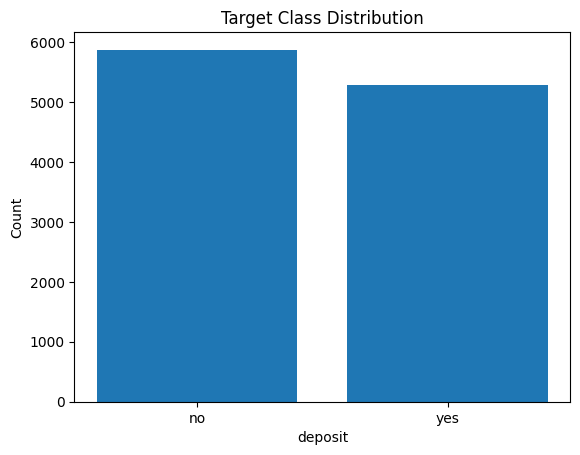

In [15]:
plot_target_distribution(original_df, 'deposit')

## Numeric Histograms

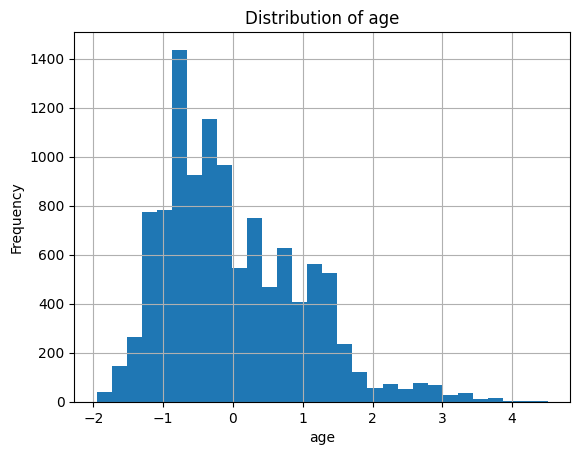

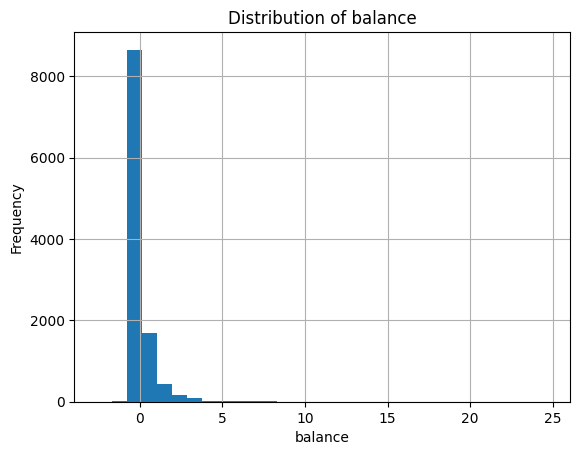

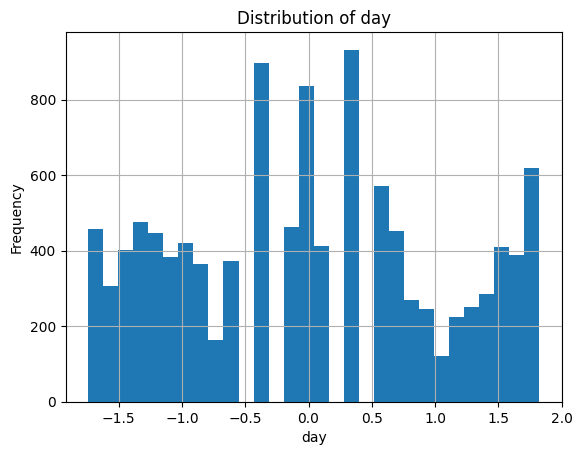

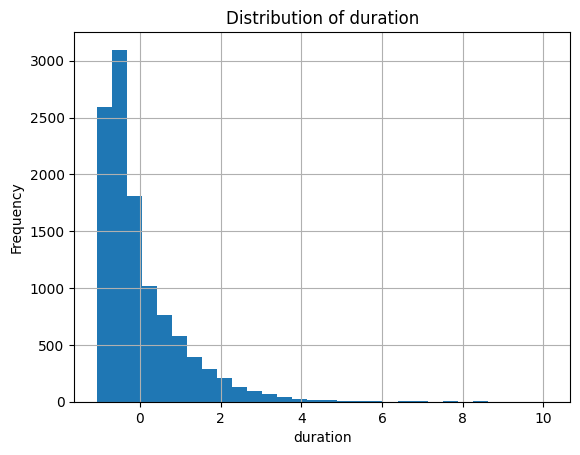

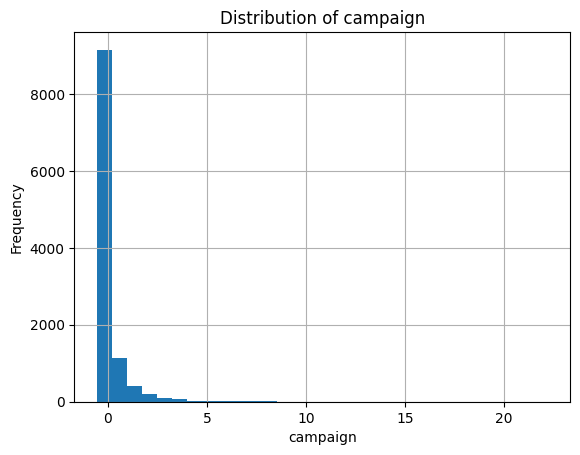

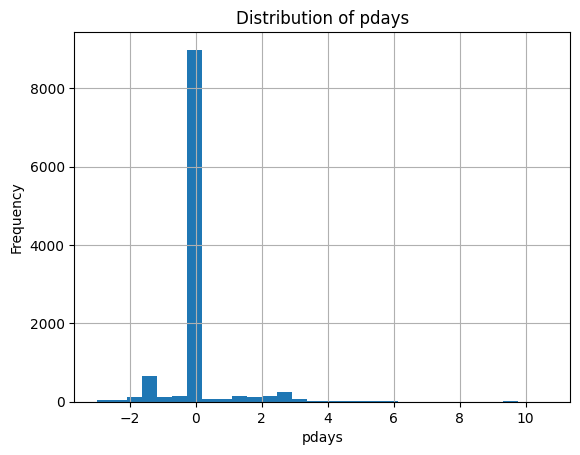

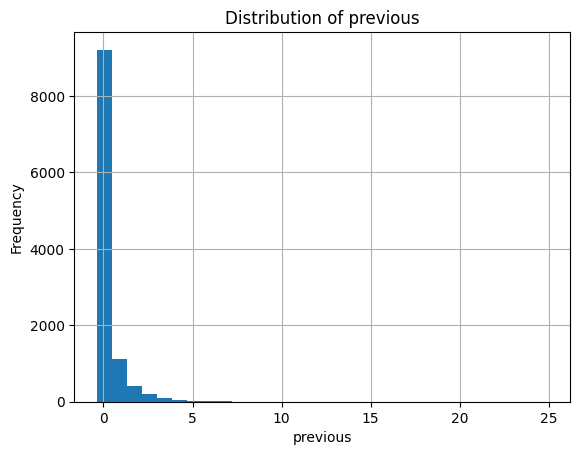

In [16]:
numeric_cols = [c for c in ['age','balance','day','duration','campaign','pdays','previous'] if c in df.columns]
plot_numeric_histograms(df, numeric_cols)

## Boxplots: Numeric vs Target

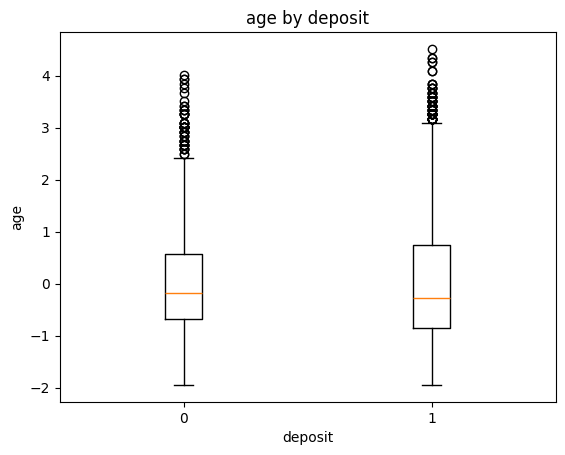

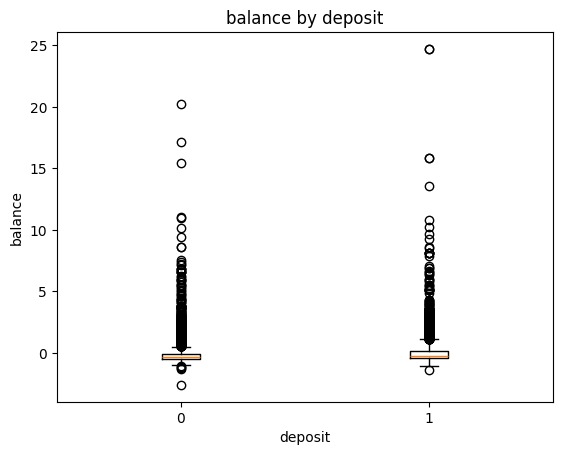

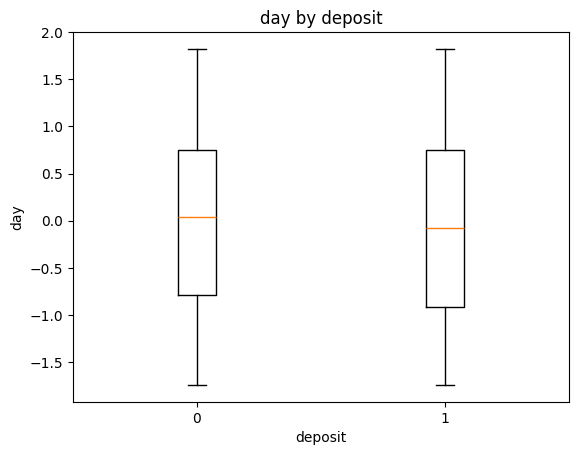

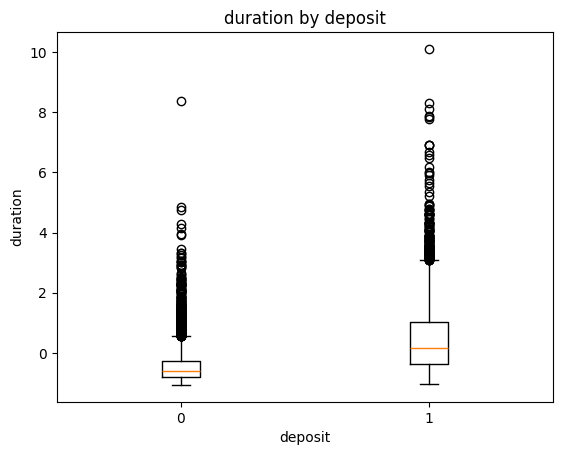

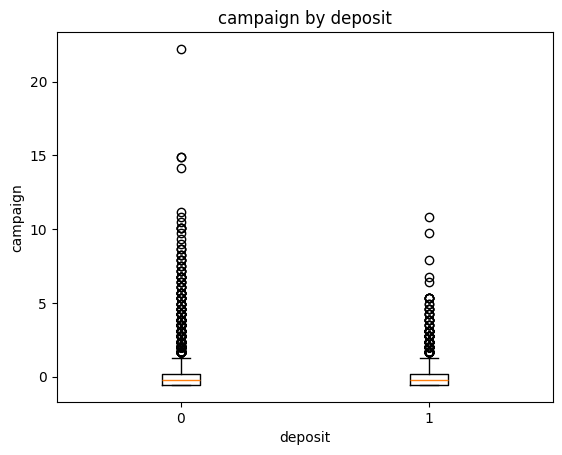

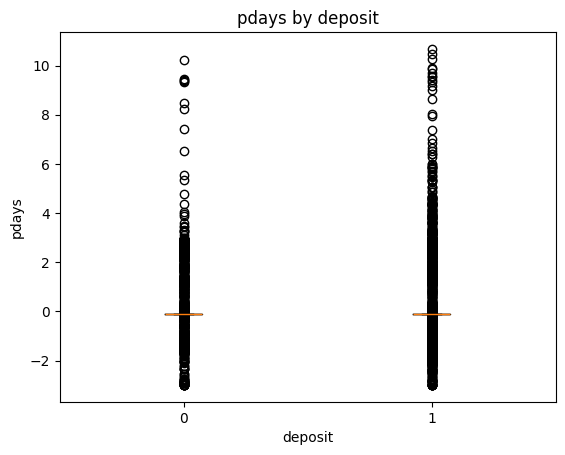

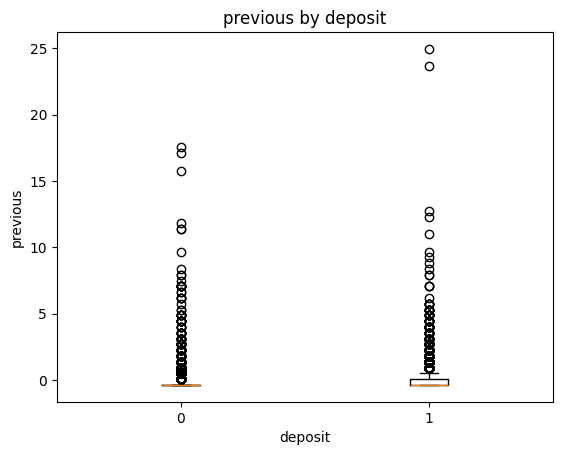

In [17]:
# Map raw target yes/no -> 1/0, then align with cleaned frame for plotting
target_mapped = original_df['deposit'].map({'yes': 1, 'no': 0})
df_for_box = df.copy()
df_for_box['deposit'] = target_mapped.values  # add numeric target column

for col in numeric_cols:
    boxplot_numeric_by_target(df_for_box, col, 'deposit')

## Correlation Heatmap (Cleaned, Numeric Only)

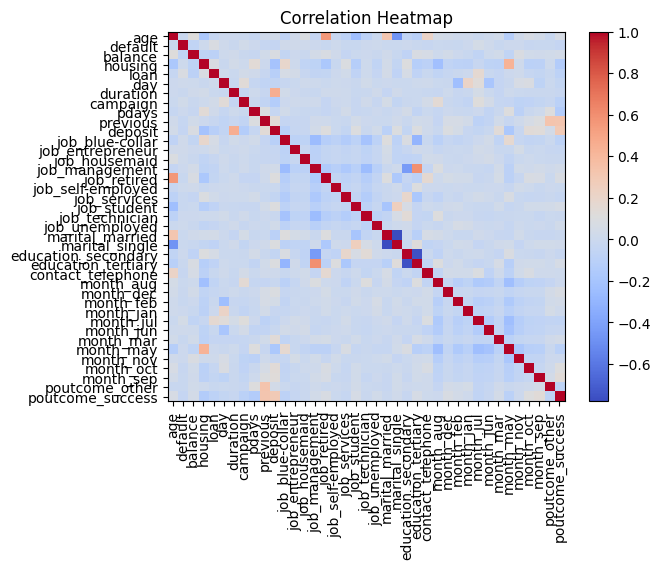

In [18]:
correlation_heatmap(df)

## Monthly Deposit Rate (uses raw 'month' + raw target)

/Users/ravdeepaulakh/Documents/CMPT459/bank-marketing-analysis/src/visualization.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = tmp.groupby('month')['deposit_num'].mean()


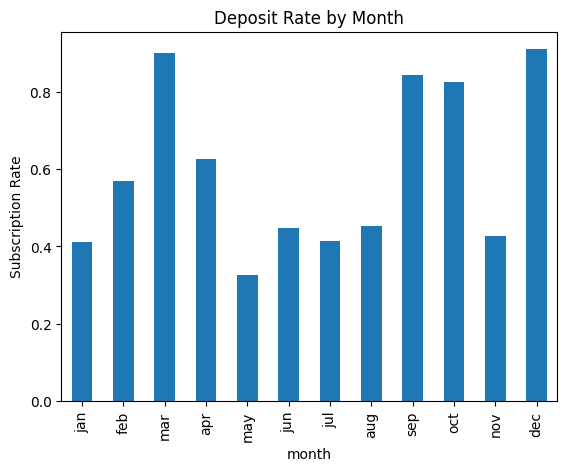

month
jan    0.412791
feb    0.568299
mar    0.898551
apr    0.625135
may    0.327550
jun    0.446809
jul    0.414135
aug    0.452930
sep    0.843260
oct    0.823980
nov    0.427359
dec    0.909091
Name: deposit_num, dtype: float64

In [19]:
rates = monthly_deposit_rate(original_df)
rates

## Quick Notes from EDA

- **Target imbalance:**  
  The dataset is highly imbalanced — only about **11–12%** of clients subscribed to a term deposit (`deposit = yes`).  
  This imbalance should be handled later (e.g., through SMOTE, resampling, or class weights).

- **Call duration is the strongest predictor:**  
  Clients with **longer call durations** are significantly more likely to subscribe.  
  This feature is highly correlated with the target and will play a key role in model performance.

- **Previous campaign success matters:**  
  Customers who had a **successful previous outcome (`poutcome = success`)** are far more likely to subscribe again.

- **Demographics and finance:**  
  - **Education:** Higher education levels (tertiary) show a slightly higher subscription rate.  
  - **Job:** Certain job types (management, technician, admin) have better response rates.  
  - **Balance:** Customers with higher average balances are somewhat more likely to subscribe.

- **Contact and timing factors:**  
  - Contacts made via **cellular** tend to perform better than “unknown” or telephone contacts.  
  - **Months such as May, August, and October** show higher subscription rates — possibly due to marketing timing.

- **Correlations:**  
  The correlation heatmap shows:
  - Strong positive correlation between `duration` and `deposit`.
  - Weak correlation among most other features — suggesting low multicollinearity.

- **Outliers:**  
  - Features like `campaign`, `balance`, and `duration` show skewed distributions with outliers.
  - Outlier handling might improve model stability later.

### Summary
Overall, the EDA confirms:
- Clear class imbalance.
- A few strong predictive variables (`duration`, `poutcome`, `contact`, `month`).
- The dataset is clean and ready for feature selection and classification modeling in the next phase.